In [1]:
#!usr/bin/python3

import speech_recognition as sr
import wave
import contextlib
import pandas as pd
import matplotlib.pyplot as plt


fname = '/home/osboxes/p_projects/scene.wav'
with contextlib.closing(wave.open(fname,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    total_length = frames / float(rate)
    total_length = int(round(total_length))
    

r = sr.Recognizer()

harvard = sr.AudioFile(fname)
transcript_str = []
with harvard as source:
    for t1 in range(int(total_length/10)):
        transcript_str.append(r.record(source, duration=10))

    transcript_str.append(r.record(source, duration=int(total_length%10)))

transcript_strings = []
for trs in transcript_str:
    try:
        dailogue = r.recognize_google(trs)
        transcript_strings.append(dailogue)
    except:
        pass


def transcript_word_analysis():
    word_matcher = {}
    for str_words in transcript_strings:
        words = str_words.split(" ")
        for j in words:
            j = j.lower()
            if j in word_matcher:
                word_matcher[j]+=1
            else:
                word_matcher[j]=1

    word_series = pd.Series(word_matcher,name="Word Counter")
    word_series.plot(kind="bar",figsize = (20,10))
    plt.title("Actual Word Distribution In The Speech")
    plt.show()


if __name__ == "__main__":
    print("Total Duration of Speech is - ", str(total_length), " Seconds.")
    print("Version of Speech Analysis Package is -", sr.__version__)
    pass


Total Duration of Speech is -  82  Seconds.
Version of Speech Analysis Package is - 3.8.1


In [2]:
print("The Transcript of Speech is - ", transcript_strings)

The Transcript of Speech is -  ["hello hello beautiful oh hey honey how are you pretty good except for the fact that you should be here now and you aren't", "I know I'm sorry I'm late but I'm really exhausted from my flight think I'll just call it a night I'll come over tomorrow you better be kidding on March 4th at hotel", "if you don't come here at sleepy tomorrow I promise you owe me a very important birthday mine", "the guilt Factor will work babe call you later love you call me later I'll be over soon love you too", "Hello darling I told you not to come how can I resist especially when you're in pajamas like that this place is a mess I was just about to go to sleep", 'how could you sleep knowing you in the same city as you very easily', "you really know how to turn me on don't you sick you know that you love it so what are you going to do tonight I'm going to sleep just like I", 'you can leave how about I just sleep with you no funny business promise just cuddling cuddling']


Word Frequency Present in the Speech


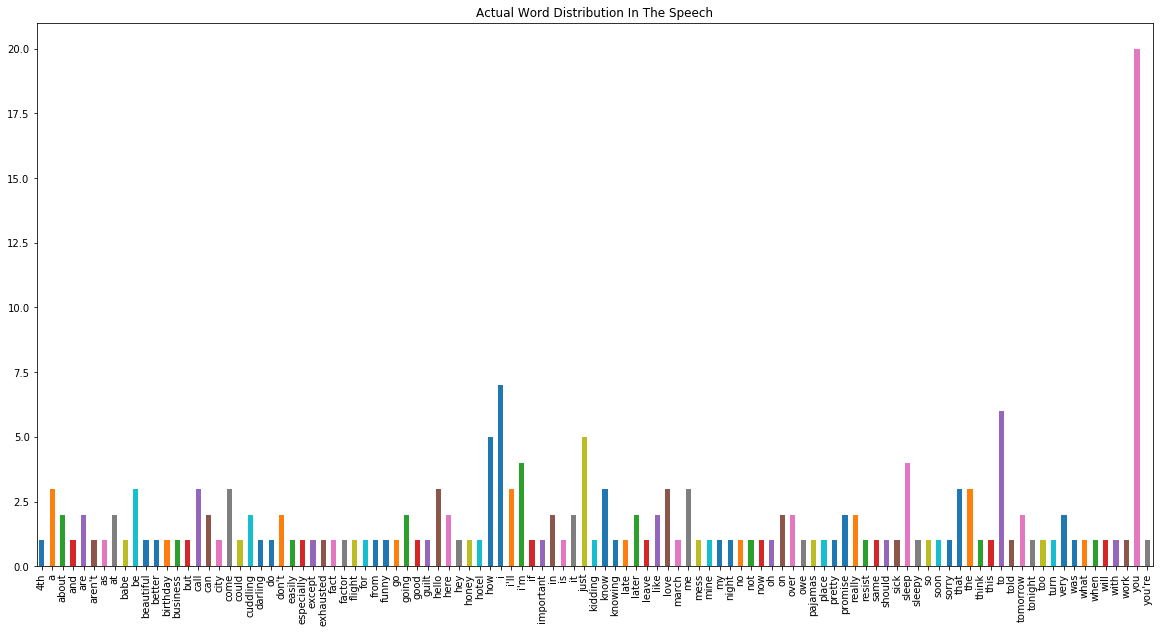

In [3]:
print("Word Frequency Present in the Speech")
transcript_word_analysis()